In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
crime = pd.read_csv("NYC_Crime.csv")
print(crime)

         Unnamed: 0  arrest_key arrest_date  \
0                 0   192799737  2019-01-26   
1                 1   193260691  2019-02-06   
2                 2   149117452  2016-01-06   
3                 3   190049060  2018-11-15   
4                 4    24288194  2006-09-13   
...             ...         ...         ...   
3881984     3881984    24592084  2006-10-01   
3881985     3881985    24028282  2006-08-25   
3881986     3881986    24036787  2006-08-26   
3881987     3881987    24028407  2006-08-25   
3881988     3881988    24321597  2006-09-14   

                                            pd_desc  \
0                                      SEXUAL ABUSE   
1           CRIMINAL SALE OF A CONTROLLED SUBSTANCE   
2                                            RAPE 3   
3                                            RAPE 1   
4                              TRESPASS 3, CRIMINAL   
...                                             ...   
3881984  LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIE

In [7]:
# Rename the column
crime = crime.rename(columns={'arrest_boro': 'borough'})

# Remap the values
arrest_boro_map = {'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'S': 'Staten Island', 'B': 'Bronx'}
crime['borough'] = crime['borough'].map(arrest_boro_map)

In [8]:
crime['ofns_desc'].unique()

array(['SEX CRIMES', 'CONTROLLED SUBSTANCES OFFENSES', 'RAPE',
       'CRIMINAL TRESPASS', 'ASSAULT 3 & RELATED OFFENSES', 'THEFT',
       'FELONY ASSAULT', 'PROSTITUTION & RELATED OFFENSES',
       'DANGEROUS WEAPONS', 'MISCELLANEOUS PENAL LAW', 'DANGEROUS DRUGS',
       'FRAUDS', 'POSSESSION OF STOLEN PROPERTY 5', 'FORGERY', 'BURGLARY',
       'ROBBERY', 'FORCIBLE TOUCHING', 'OFFENSES INVOLVING FRAUD',
       'TERRORISM', 'ARSON', 'LARCENY', 'SEX OFFENSES', 'THEFT-FRAUD',
       'OTHER STATE LAWS', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'F.C.A. P.I.N.O.S.', 'ASSAULT', 'OFFENSES AGAINST THE PERSON',
       'PROSTITUTION OFFENSES', 'FIREARMS AND OTHER DANGEROUS WEAPONS',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'VEHICLE AND TRAFFIC LAWS', 'OTHER OFFENSES RELATED TO THEFT',
       'DISORDERLY CONDUCT', 'GRAND LARCENY', 'PETIT LARCENY',
       'OTHER TRAFFIC INFRACTION', "BURGLAR'S TOOLS",
       'OTHER STATE LAWS (NON PENAL LAW)',
       'INTOXICATED & IMPA

In [14]:
#Classify crimes as violent or non-violent
crime['violent_crime'] = np.full(len(crime), False)
crime['violent_crime'] = np.where(crime['ofns_desc'].isin([
    'SEX CRIMES', 'RAPE', 'ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
    'ROBBERY', 'FORCIBLE TOUCHING', 'TERRORISM', 'SEX OFFENSES', 'ASSAULT',
    'MURDER & NON-NEGL. MANSLAUGHTE', 'KIDNAPPING & RELATED OFFENSES', 
    'MURDER & NON-NEGL. MANSLAUGHTER', 'KIDNAPPING, COERCION', 
    'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'KIDNAPPING', 'HOMICIDE-NEGLIGENT-VEHICLE',
    'HOMICIDE', 'HOMICIDE-NEGLIGENT,UNCLASSIFIED'
]), True, False)

In [23]:
# Create a new dataframe with the three columns.
crime_cleaned = pd.DataFrame(columns=['borough', 'violent_crime_count', 'nonviolent_crime_count'])

# Iterate over the unique boroughs in the crime dataframe.
for borough in crime['borough'].unique():
    # Create a new DataFrame with a single row for the borough.
    borough_df = pd.DataFrame({'borough': borough}, index=[0])
    
    # Count the number of violent and nonviolent crimes in the borough.
    violent_crime_count = crime['violent_crime'].loc[(crime['borough'] == borough) & crime['violent_crime'] == True].sum()
    nonviolent_crime_count = crime['violent_crime'].loc[(crime['borough'] == borough) & crime['violent_crime'] == False].sum()

    # Add the crime counts to the borough DataFrame.
    borough_df['violent_crime_count'] = violent_crime_count
    borough_df['nonviolent_crime_count'] = nonviolent_crime_count

    # Append the borough DataFrame to the cleaned crime DataFrame.
    crime_cleaned = pd.concat([crime_cleaned, borough_df], ignore_index=True)

In [24]:
print(crime_cleaned)

         borough violent_crime_count nonviolent_crime_count
0      Manhattan              136012                 572524
1       Brooklyn              214468                 494068
2          Bronx              181741                 526795
3         Queens              149613                 558923
4  Staten Island               26702                 681834


In [25]:
crime_cleaned.to_csv("crime_cleaned.csv")

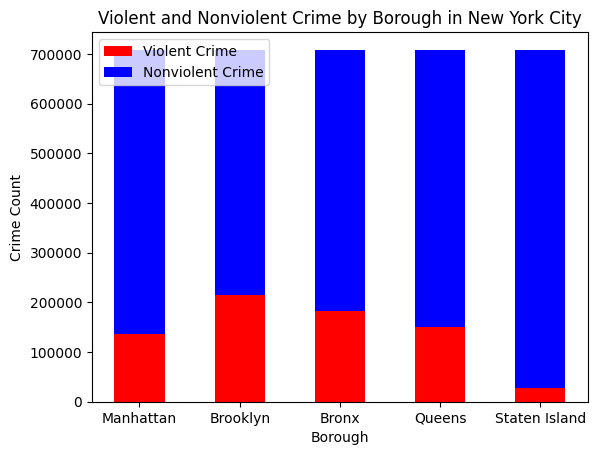

In [31]:
# Create the bar chart
fig, ax = plt.subplots()

# Create a bar for the violent crime count
ax.bar(crime_cleaned['borough'], crime_cleaned['violent_crime_count'], width=0.5, color='red')

# Create a bar for the nonviolent crime count, offset by the width of the first bar
ax.bar(crime_cleaned['borough'], crime_cleaned['nonviolent_crime_count'], color='blue', width=0.5, bottom=crime_cleaned['violent_crime_count'])

# Set the chart title and labels
ax.set_title('Violent and Nonviolent Crime by Borough in New York City')
ax.set_xlabel('Borough')
ax.set_ylabel('Crime Count')

# Add a legend
ax.legend(['Violent Crime', 'Nonviolent Crime'], loc='upper left')

# Show the chart
plt.show()